### G(n,m) networks

In [6]:
#get data and format
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import glob
method_list = ["composition-rejection", "event-driven"]
name_list = ["m50000","m150000","m500000","m1500000","m5000000"]
average_degree_list_gnm = [10,30,100,300,1000]
mean_time_list_dict_gnm = dict()
std_time_list_dict_gnm = dict()
for method in method_list:
    mean_time_list = []
    std_time_list = []
    for name in name_list:
        time_list = np.array([])
        file_list = glob.glob("./dat/SIR_results/"+method+"/gnm_n1E4/"+name+"_*")
        for file in file_list:
            x = np.loadtxt(file)[:,0]
            if len(x.shape)==0:
                x = np.array([x])
            time_list = np.concatenate((time_list,x))
        mean_time_list.append(np.mean(time_list))
        std_time_list.append(np.std(time_list))
    mean_time_list_dict_gnm[method] = np.array(mean_time_list)
    std_time_list_dict_gnm[method] = np.array(std_time_list)

### Power law 225 networks

In [7]:
#get data and format
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import glob
method_list = ["composition-rejection", "event-driven"]
name_list = ["n1000","n3000","n10000","n30000","n100000","n300000","n1000000"]
size_list_PL = [1000,3000,10000,30000,100000,300000,1000000]
mean_time_list_dict_PL225 = dict()
std_time_list_dict_PL225 = dict()
for method in method_list:
    mean_time_list = []
    std_time_list = []
    for name in name_list:
        time_list = np.array([])
        file_list = glob.glob("./dat/SIR_results/"+method+"/power_law_225/"+name+"_*")
        for file in file_list:
            x = np.loadtxt(file)[:,0]
            if len(x.shape)==0:
                x = np.array([x])
            time_list = np.concatenate((time_list,x))
        mean_time_list.append(np.mean(time_list))
        std_time_list.append(np.std(time_list))
    mean_time_list_dict_PL225[method] = np.array(mean_time_list)
    std_time_list_dict_PL225[method] = np.array(std_time_list)

### Power-law 300 networks

In [8]:
#get data and format
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import glob
method_list = ["composition-rejection", "event-driven"]
name_list = ["n1000","n3000","n10000","n30000","n100000","n300000","n1000000"]
size_list_PL = [1000,3000,10000,30000,100000,300000,1000000]
mean_time_list_dict_PL300 = dict()
std_time_list_dict_PL300 = dict()
for method in method_list:
    mean_time_list = []
    std_time_list = []
    for name in name_list:
        time_list = np.array([])
        file_list = glob.glob("./dat/SIR_results/"+method+"/power_law_300/"+name+"_*")
        for file in file_list:
            x = np.loadtxt(file)[:,0]
            if len(x.shape)==0:
                x = np.array([x])
            time_list = np.concatenate((time_list,x))
        mean_time_list.append(np.mean(time_list))
        std_time_list.append(np.std(time_list))
    mean_time_list_dict_PL300[method] = np.array(mean_time_list)
    std_time_list_dict_PL300[method] = np.array(std_time_list)

### Display computation time

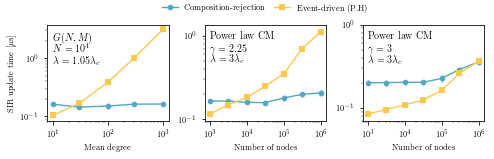

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
font_size=8
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
color_list = ["#52a7c4","#ff8956", "#fcc84e", "#9d65af", "#b2d689"]
width = 7.057
height = 0.9*width/3

fig, axes = plt.subplots(1,3, figsize=(width, height))
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.96, top=0.88, wspace=0.3, hspace=0.25)
symbol_map = {'composition-rejection':'-o', 'event-driven':'-s'}
color_map = {'composition-rejection':color_list[0], 
             'event-driven':color_list[2]}
label_map= {'composition-rejection': 'Composition-rejection', 
             'event-driven': 'Event-driven (P.H)'}

line = []
label = []
#gnm
for method in method_list:
    l = axes[0].errorbar(average_degree_list_gnm, np.array(mean_time_list_dict_gnm[method]), 
                     yerr = np.array(std_time_list_dict_gnm[method]), fmt =symbol_map[method], 
                     color = color_map[method])
    line.append(l.lines[0])
    label.append(label_map[method])
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_xlabel(r'Mean degree')
    
#plot power law 225
for method in method_list:
    axes[1].errorbar(size_list_PL, mean_time_list_dict_PL225[method], 
                     yerr = std_time_list_dict_PL225[method], fmt =symbol_map[method], 
                     color = color_map[method])
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].set_xlabel(r'Number of nodes')

#plot power law 300
for method in method_list:
    axes[2].errorbar(size_list_PL, mean_time_list_dict_PL300[method], 
                     yerr = std_time_list_dict_PL300[method], fmt =symbol_map[method], 
                     color = color_map[method])
    axes[2].set_xscale('log')
    axes[2].set_yscale('log')
    axes[2].set_xlabel(r'Number of nodes')

axes[2].set_ylim([0.07,1])
axes[0].set_ylabel(r'SIR update time [$\mu$s]')
axes[0].text(10,0.8, '$G(N,M)$\n$N=10^4$\n$\lambda=1.05\lambda_c$')
axes[1].text(10**3,0.48, 'Power law CM\n$\gamma = 2.25$\n$\lambda=3\lambda_c$')
axes[2].text(10**3,0.35, 'Power law CM\n$\gamma = 3$\n$\lambda=3\lambda_c$')
fig.legend((line[0], line[1]), (label[0],label[1]),loc = (0.32,0.9), ncol = 3, 
           fontsize = font_size, frameon = False, columnspacing=1.1)
plt.savefig('SIR_benchmark.png')
plt.show()